In [9]:
import numpy as np
# Load the iris dataset
import pandas as pd
iris = pd.read_csv("Iris.csv")
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [10]:
# Converting string labels into numbers.
iris.Species = le.fit_transform(iris.Species)
#Drop id column
iris = iris.drop('Id',axis=1)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [11]:
# Standardize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Calculate the covariance matrix
covariance_matrix = np.cov(X.T)

In [12]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues in descending order
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [13]:
# Choose the top k eigenvectors
k = 2  # Number of principal components to keep
selected_eigenvectors = np.array([eigen_pairs[i][1] for i in range(k)])

In [14]:
# Transform the data to the new feature space
X_pca = np.dot(X, selected_eigenvectors.T)

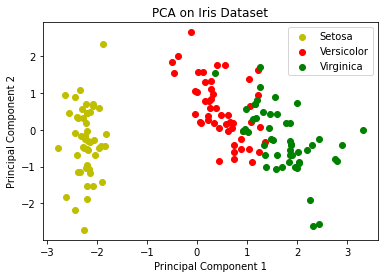

In [15]:
# Visualize the transformed data
import matplotlib.pyplot as plt

colors = ['y', 'r', 'g']
labels = ['Setosa', 'Versicolor', 'Virginica']

for target, color in zip(np.unique(y), colors):
    indices = np.where(y == target)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], c=color, label=labels[target])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()